<a href="https://www.kaggle.com/code/mudassirabbassi/linux-log-anomalies-detections?scriptVersionId=271108004" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("/kaggle/input/linux-logs/Linux_2k.log_structured.csv")
data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,LineId,Month,Date,Time,Level,Component,PID,Content,EventId,EventTemplate
0,1,Jun,14,15:16:01,combo,sshd(pam_unix),19939.0,authentication failure; logname= uid=0 euid=0 ...,E16,authentication failure; logname= uid=0 euid=0 ...
1,2,Jun,14,15:16:02,combo,sshd(pam_unix),19937.0,check pass; user unknown,E27,check pass; user unknown
2,3,Jun,14,15:16:02,combo,sshd(pam_unix),19937.0,authentication failure; logname= uid=0 euid=0 ...,E16,authentication failure; logname= uid=0 euid=0 ...
3,4,Jun,15,02:04:59,combo,sshd(pam_unix),20882.0,authentication failure; logname= uid=0 euid=0 ...,E18,authentication failure; logname= uid=0 euid=0 ...
4,5,Jun,15,02:04:59,combo,sshd(pam_unix),20884.0,authentication failure; logname= uid=0 euid=0 ...,E18,authentication failure; logname= uid=0 euid=0 ...
...,...,...,...,...,...,...,...,...,...,...
1995,1996,Jul,27,14:41:59,combo,kernel,NaN,pci_hotplug: PCI Hot Plug PCI Core version: 0.5,E83,pci_hotplug: PCI Hot Plug PCI Core version: <*...
1996,1997,Jul,27,14:42:00,combo,kernel,NaN,isapnp: Scanning for PnP cards...,E60,isapnp: Scanning for PnP cards...
1997,1998,Jul,27,14:42:00,combo,kernel,NaN,isapnp: No Plug & Play device found,E59,isapnp: No Plug & Play device found
1998,1999,Jul,27,14:42:00,combo,kernel,NaN,Real Time Clock Driver v1.12,E87,Real Time Clock Driver v<*>.<*>


# Step 3: Inspect data


In [3]:
print(data.head())
print("\nColumns:", data.columns)

   LineId Month  Date      Time  Level       Component      PID  \
0       1   Jun    14  15:16:01  combo  sshd(pam_unix)  19939.0   
1       2   Jun    14  15:16:02  combo  sshd(pam_unix)  19937.0   
2       3   Jun    14  15:16:02  combo  sshd(pam_unix)  19937.0   
3       4   Jun    15  02:04:59  combo  sshd(pam_unix)  20882.0   
4       5   Jun    15  02:04:59  combo  sshd(pam_unix)  20884.0   

                                             Content EventId  \
0  authentication failure; logname= uid=0 euid=0 ...     E16   
1                           check pass; user unknown     E27   
2  authentication failure; logname= uid=0 euid=0 ...     E16   
3  authentication failure; logname= uid=0 euid=0 ...     E18   
4  authentication failure; logname= uid=0 euid=0 ...     E18   

                                       EventTemplate  
0  authentication failure; logname= uid=0 euid=0 ...  
1                           check pass; user unknown  
2  authentication failure; logname= uid=0 euid=

# Step 4: Choose the text column for analysis (Content or EventTemplate)
**We'll use 'Content' as it contains the actual log message**

In [4]:

data['Content'] = data['Content'].astype(str).fillna("")

# Step 5: Convert text into numerical features using TF-IDF

In [5]:

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(data['Content'])

# Optional Improvements

**You can also: Use both Content + EventTemplate together for better features:**

In [6]:


data['combined_text'] = data['Content'].astype(str) + " " + data['EventTemplate'].astype(str)
X = vectorizer.fit_transform(data['combined_text'])




# Step 6: Train Isolation Forest model\


**Visualize anomalies by frequency or time trends.Replace IsolationForest with OneClassSVM or a deep learning Autoencoder if you want more advanced detection.**


In [7]:

model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X)

IsolationForest(contamination=0.05, random_state=42)


# Step 7: Predict anomalies

In [8]:

data['anomaly'] = model.predict(X)

# Step 8: Interpret results
**In Isolation Forest: -1 = anomaly, 1 = normal**

In [9]:

anomalies = data[data['anomaly'] == -1]
normal = data[data['anomaly'] == 1]

In [10]:
print(f" Total rows: {len(data)}")
print(f"| Anomalies detected: {len(anomalies)}")

 Total rows: 2000
| Anomalies detected: 98


# Show some examples of detected anomalies


In [11]:
print("\n Sample anomalies:")
print(anomalies[['Date', 'Time', 'Level', 'Component', 'Content']].head(10))


 Sample anomalies:
     Date      Time  Level Component  \
771     4  12:52:44  combo      ftpd   
772     4  12:52:44  combo      ftpd   
773     4  12:52:44  combo      ftpd   
774     4  12:52:44  combo      ftpd   
775     4  12:52:44  combo      ftpd   
776     4  12:52:44  combo      ftpd   
777     4  12:52:44  combo      ftpd   
778     4  12:52:44  combo      ftpd   
779     4  12:52:44  combo      ftpd   
780     4  12:52:44  combo      ftpd   

                                               Content  
771  connection from 63.197.98.106 (adsl-63-197-98-...  
772  connection from 63.197.98.106 (adsl-63-197-98-...  
773  connection from 63.197.98.106 (adsl-63-197-98-...  
774  connection from 63.197.98.106 (adsl-63-197-98-...  
775  connection from 63.197.98.106 (adsl-63-197-98-...  
776  connection from 63.197.98.106 (adsl-63-197-98-...  
777  connection from 63.197.98.106 (adsl-63-197-98-...  
778  connection from 63.197.98.106 (adsl-63-197-98-...  
779  connection from 63.19

In [29]:
anomalies['Content'].value_counts()

Content
connection from 63.197.98.106 (adsl-63-197-98-106.dsl.mtry01.pacbell.net) at Mon Jul  4 12:52:44 2005    23
connection from 216.12.111.241 () at Thu Jul 21 09:04:41 2005                                            22
connection from 83.116.207.11 (aml-sfh-3310b.adsl.wanadoo.nl) at Sun Jul 17 06:13:37 2005                14
connection from 83.116.207.11 (aml-sfh-3310b.adsl.wanadoo.nl) at Sun Jul 17 06:14:36 2005                11
connection from 172.181.208.156 () at Tue Jul 26 05:47:51 2005                                            5
connection from 83.116.207.11 (aml-sfh-3310b.adsl.wanadoo.nl) at Sun Jul 17 06:13:38 2005                 5
connection from 207.30.238.8 (host8.topspot.net) at Sun Jul 17 14:02:54 2005                              3
connection from 83.116.207.11 (aml-sfh-3310b.adsl.wanadoo.nl) at Sun Jul 17 04:06:32 2005                 2
connection from 207.30.238.8 (host8.topspot.net) at Sun Jul 17 14:02:59 2005                              2
connection from 207.

In [30]:
anomalies['Content'].shape

(98,)

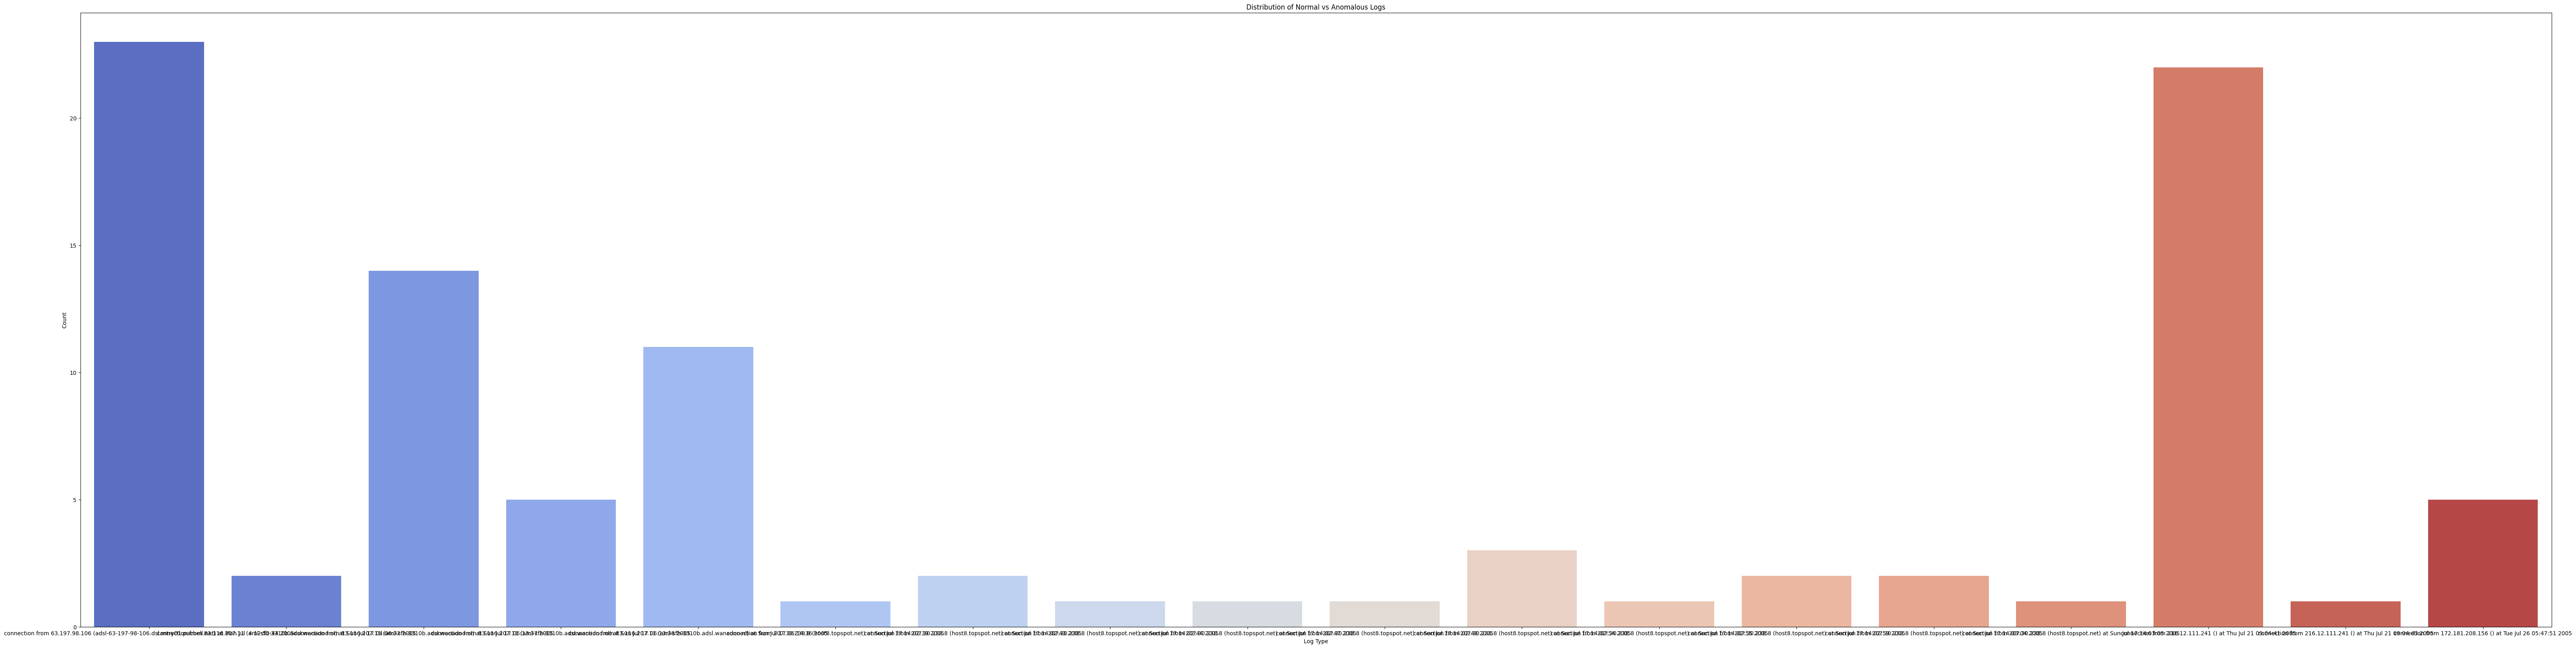

In [28]:
plt.figure(figsize=(80, 20))
sns.countplot(x=anomalies['Content'], data=data, palette='coolwarm')
plt.title("Distribution of Normal vs Anomalous Logs")
plt.xlabel("Log Type")
plt.ylabel("Count")
plt.show()